In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [8]:
df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [9]:
#Karena datanya banyak, jadi coba di ambil data untuk negara Indonesia saja
df2 = df[df['Country']=='Indonesia']

#Karena ada data suhu yang NaN akhirnya coba "Keep the DataFrame with valid entries in the same variable".
df2.dropna(inplace=True)

df2.loc[:,'dt'] = pd.to_datetime(df2['dt'])

df2.loc[:,'month'] = [x.month for x in list(df2['dt'])]
df2.loc[:,'year'] = [x.year for x in list(df2['dt'])]

C:\Users\hanin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hanin\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\hanin\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

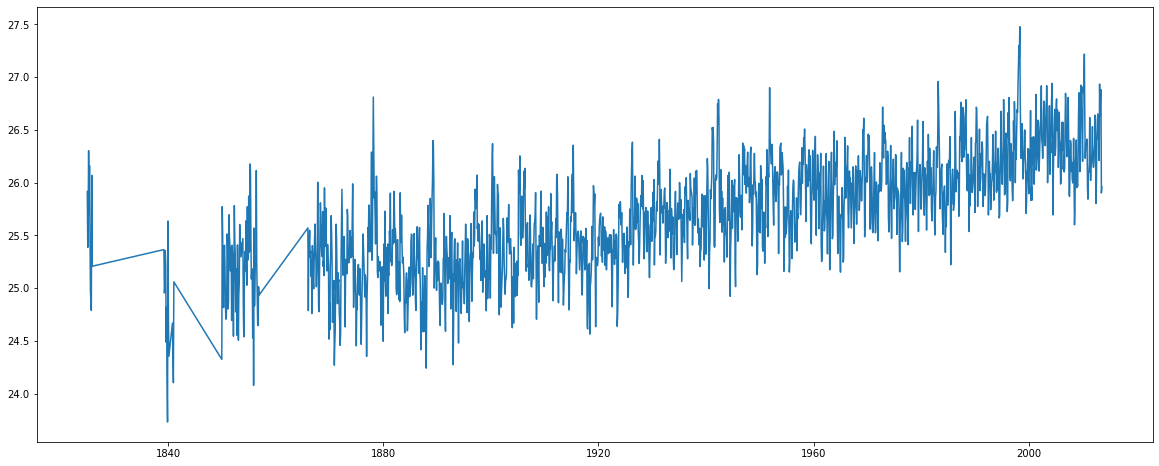

In [10]:
fig = plt.figure(figsize=(20,8))
plt.plot(df2['dt'], df2['AverageTemperature'])
plt.show()

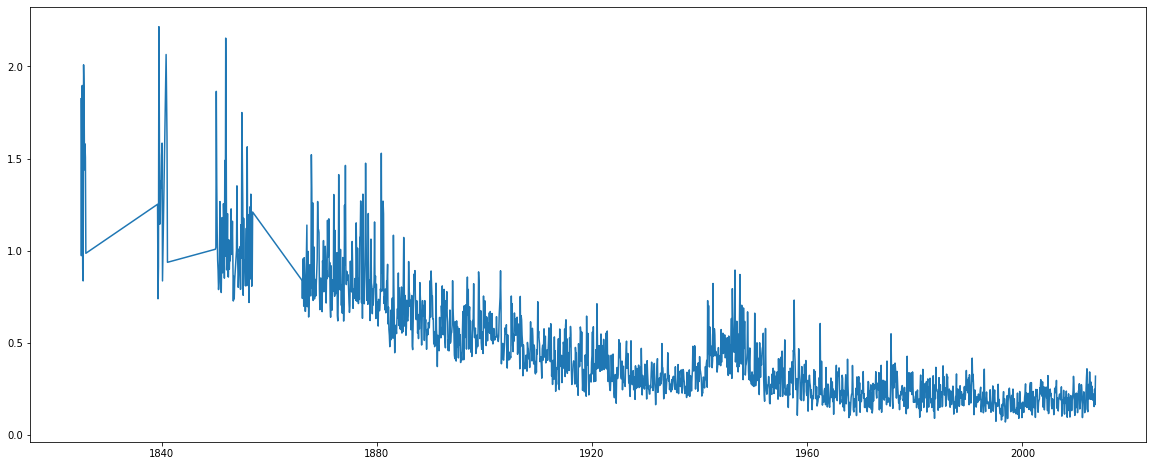

In [11]:
fig = plt.figure(figsize=(20,8))
plt.plot(df2['dt'], df2['AverageTemperatureUncertainty'])
plt.show()

In [12]:
X = df2['AverageTemperatureUncertainty'].values.reshape(-1,1)
y = df2['AverageTemperature'].values.reshape(-1,1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #training and test sets

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#To retrieve the intercept: Menyatakan letak dimana garis melewati sumbu Y
print(regressor.intercept_)
#For retrieving the slope: Menyatakan Gradien
print(regressor.coef_)

[26.11763807]
[[-0.98459285]]


In [16]:
y_pred = regressor.predict(X_test)
df3 = pd.DataFrame({'Nilai Aktual': y_test.flatten(), 'Nilai Prediksi': y_pred.flatten()})
df3

,Nilai Aktual,Nilai Prediksi
0,25.322,25.699186
1,25.384,25.379193
2,24.798,25.316179
3,25.873,25.933519
4,26.268,25.810445
...,...,...
371,25.192,25.625342
372,25.160,25.596788
373,25.580,25.753339
374,25.959,25.930565


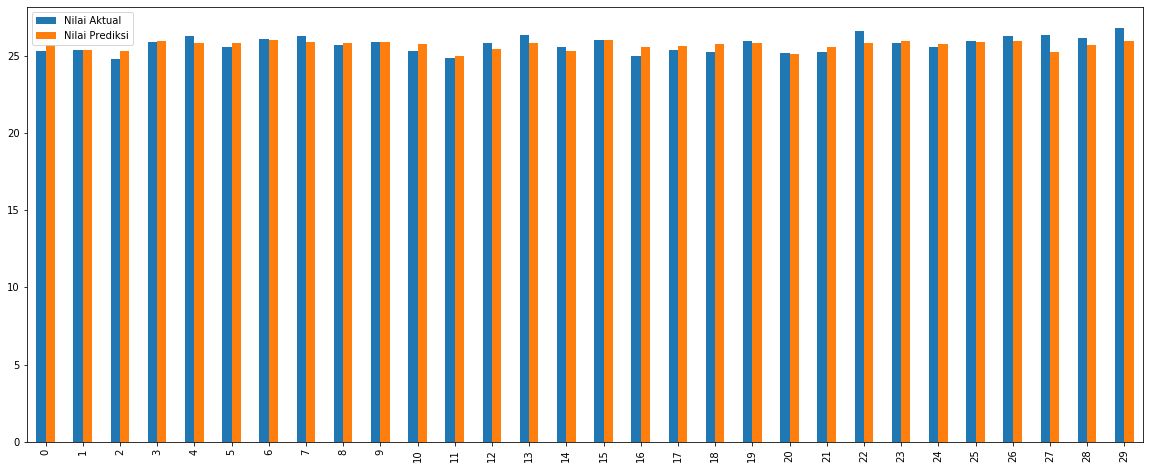

In [17]:
df4 = df3.head(30) #Data yang diplot hanya 30 Buah karena terlalu banyak
df4.plot(kind='bar',figsize=(20,8))